In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.datasets import make_classification
np.random.seed(42)

In [2]:
# Code given in the question
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)


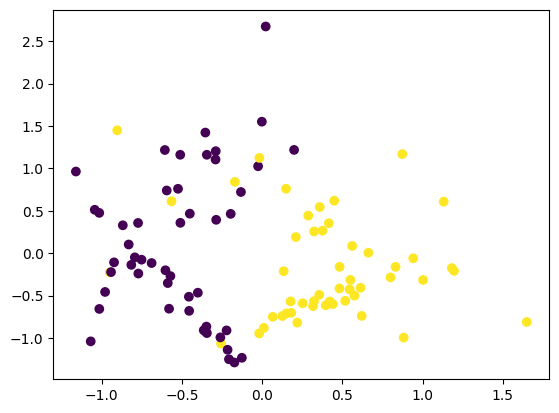

In [3]:
# For plotting
plt.scatter(X[:, 0], X[:, 1], c=y)

In [12]:
X = pd.DataFrame(X, columns=["X1", "X2"])
y = pd.Series(y, dtype="category")

In [13]:
# Train-test split (70%-30%)
train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [14]:
print("Train data length: ", len(X_train))
print("Test data length: ", len(X_test))

Train data length:  70
Test data length:  30


In [15]:
tree = DecisionTree(criterion="information_gain", max_depth=5)
tree.fit(X_train, y_train)

In [17]:
y_pred = tree.predict(X_test)
accuracy_ = accuracy(y_test, y_pred)
print("Accuracy of the model:", accuracy_, "\n")
print("Precision for Class 0:", precision(y_pred, y_test, 0))
print("Recall for Class 0:", recall(y_pred, y_test, 0),"\n")
print("Precision for Class 1:", precision(y_pred, y_test, 1))
print("Recall for Class 1:", recall(y_pred, y_test, 1),"\n")

Accuracy of the model: 0.9 

Precision for Class 0: 0.9090909090909091
Recall for Class 0: 0.8333333333333334 

Precision for Class 1: 0.8947368421052632
Recall for Class 1: 0.9444444444444444 



In [19]:
print("Accuracy:", accuracy(y_pred, y_test))
for cls in y.unique():
    print(f"Class {cls} -> Precision: {precision(y_pred, y_test, cls)}, Recall: {recall(y_pred, y_test, cls)}")


Accuracy: 0.9
Class 1 -> Precision: 0.8947368421052632, Recall: 0.9444444444444444
Class 0 -> Precision: 0.9090909090909091, Recall: 0.8333333333333334


In [8]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
k=5
accuracies = []
trees = []
for depth in max_depth:
    fold_size = int(len(X)/k)
    for i in range(k):
        test_start = i * fold_size
        test_end = (i + 1) * fold_size
        test_set = pd.DataFrame(X[test_start:test_end])
        test_labels = pd.Series(y[test_start:test_end])

        train_set = np.concatenate([X[:test_start], X[test_end:]])
        train_labels = np.concatenate([y[:test_start], y[test_end:]])
        train_set = pd.DataFrame(train_set)
        train_labels = pd.Series(train_labels)

        tree = DecisionTree(criterion='gini_index', max_depth=depth)
        tree.fit(train_set, train_labels)

        y_pred = tree.predict(test_set)
        accuracy_ = accuracy(test_labels, y_pred)
        accuracies.append((depth,i+1,accuracy_))
        trees.append(tree)

In [9]:
accuracies = pd.DataFrame(accuracies, columns=['Depth', 'Fold', 'val_Accuracy'])

In [10]:
accuracies

,Depth,Fold,val_Accuracy
0,1,1,0.90
1,1,2,0.85
2,1,3,0.90
3,1,4,0.85
4,1,5,0.95
5,2,1,0.90
6,2,2,0.95
7,2,3,0.90
8,2,4,0.85
9,2,5,0.95


<Axes: xlabel='Depth'>

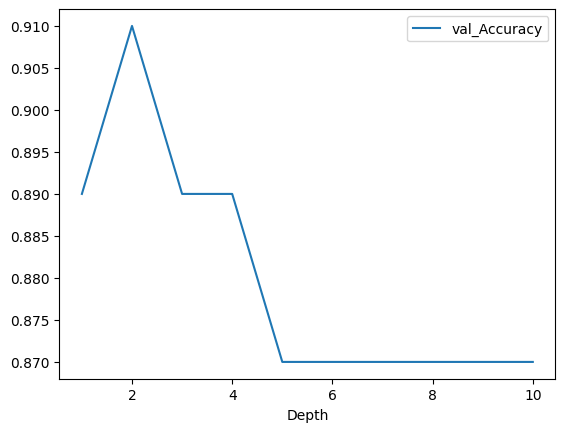

In [11]:
accuracies.groupby('Depth').mean().plot(y='val_Accuracy')